In [18]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
%matplotlib inline

In [67]:
def f(lambda2, lambda3, d):
    f_out = []
    for i in lambda2:
        for j in lambda3:
            f_out.append((i**2 - d[0]**2)**2 + ((i-j)**2 - d[1]**2)**2 + (j**2 - d[2]**2)**2)
    return f_out
    
#def df(lambda2, lambda3, d):
#    i = lambda2
#    j = lambda3
#    return np.asarray([4*(i**2-d[0]**2)*i + 4*((i-j)**2 - d[2]**2)*(i-j), 
#            4*(j**2-d[1]**2)*j - 4*((i-j)**2 - d[2]**2)*(i-j)])

def df(lambdas, dists):
    pairs = list(combinations(list(range(len(lambdas)+1)), 2))
    derivatives = []
    for i,l in enumerate(lambdas):
        di = 0
        for pair, d in zip(pairs, dists):
            if pair[0] == 0 and i+1 == pair[1]:
                di += 4*l*(l**2-d**2)
            elif i+1 == pair[0]:
                di += 4*(l-lambdas[pair[1]-1])*((l-lambdas[pair[1]-1])**2 - d**2)
            elif i+1 == pair[1]:
                di -= 4*(l-lambdas[pair[1]-1])*((l-lambdas[pair[1]-1])**2 - d**2)
        derivatives.append(di)
    return np.asarray(derivatives)
                

def grad_desc(point, d, step, tol=1e-2):
    actual = point
    next_v = actual + step*df(point, d)
    while np.linalg.norm(actual - next_v) > tol:
        actual = next_v
        next_v = actual + step*df(actual,d)
        
    return actual

def generate_distances(points):
    dists = []
    pairs = list(combinations(list(range(len(points))), 2))
    for pair in pairs:
        dists.append(abs(points[pair[0]] - points[pair[1]]))
    return np.asarray(dists)
    
    
    

Original points:  [0 9 7 6 3 8 4 1 2]
Original distances:  [9 7 6 3 8 4 1 2 2 3 6 1 5 8 7 1 4 1 3 6 5 3 2 2 5 4 5 1 2 1 4 7 6 3 2 1]
Points:  [ 9.42087333  7.39134544  6.36314242  3.40656791  8.40859783  4.31888088
  1.4820774   3.27024879]


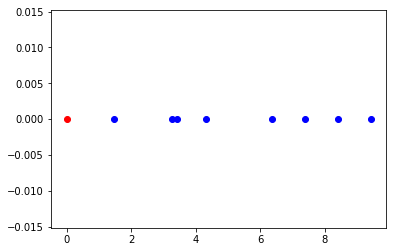

In [72]:
#lambdas = np.array([0,5,8])
pts_size = 10
lambdas = np.arange(1,10)
np.random.shuffle(lambdas)
lambdas = lambdas[:pts_size]
lambdas[0] = 0
print('Original points: ', lambdas)
dists = generate_distances(lambdas)
print('Original distances: ', dists)
#delta = 1
#lambda2 = np.arange(-5,5, delta)
#lambda3 = np.arange(-4,4, delta)
#x,y = np.meshgrid(lambda2, lambda3)
#print(x.shape, y.shape)
#f_vals = np.asarray(f(lambda2, lambda3, [data[0,2], data[1,2], data[0,2]])).reshape(x.shape)
random_pt = np.random.randint(lambdas.max()+5, size=(len(lambdas)-1))
min_val = grad_desc(random_pt, dists, -1e-6, tol=1e-4)
#min_val = grad_desc(np.array([4,3]), dists, -1e-6, tol=1e-4)
print('Points: ', min_val)
plt.figure()
#CS = plt.contour(x,y,f_vals)
plt.scatter([0],[0],color='r')
plt.scatter(min_val, np.zeros(min_val.shape),color='b')
plt.show()